In [56]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as stats
import phik
import graphviz
import lightgbm
import warnings
import sklearn
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_tree as xgbtree
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from scipy.stats import randint
from scipy.stats import uniform
from phik.report import plot_correlation_matrix

warnings.filterwarnings("ignore")
sb.set()

## Data Visualization and Understanding

In [112]:
churndata = pd.read_csv('churn_model.csv')  #extracting data
churndata.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [113]:
#converting Area code(numerical type) to categorical
churndata['Area code'] = churndata['Area code'].astype('object')    
print(churndata.dtypes)

State                      object
Account length              int64
Area code                  object
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object


## Splitting data set into Categorical and Numerical types

In [115]:
churn_num_data = churndata.select_dtypes(include=["float64","int64"])

In [116]:
churn_num_data

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2
2662,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
2663,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
2664,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2


In [117]:
print(churn_num_data.dtypes)

Account length              int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
dtype: object


### Boxplot of numerical variables against Churn, a categorical var, to see feature importances

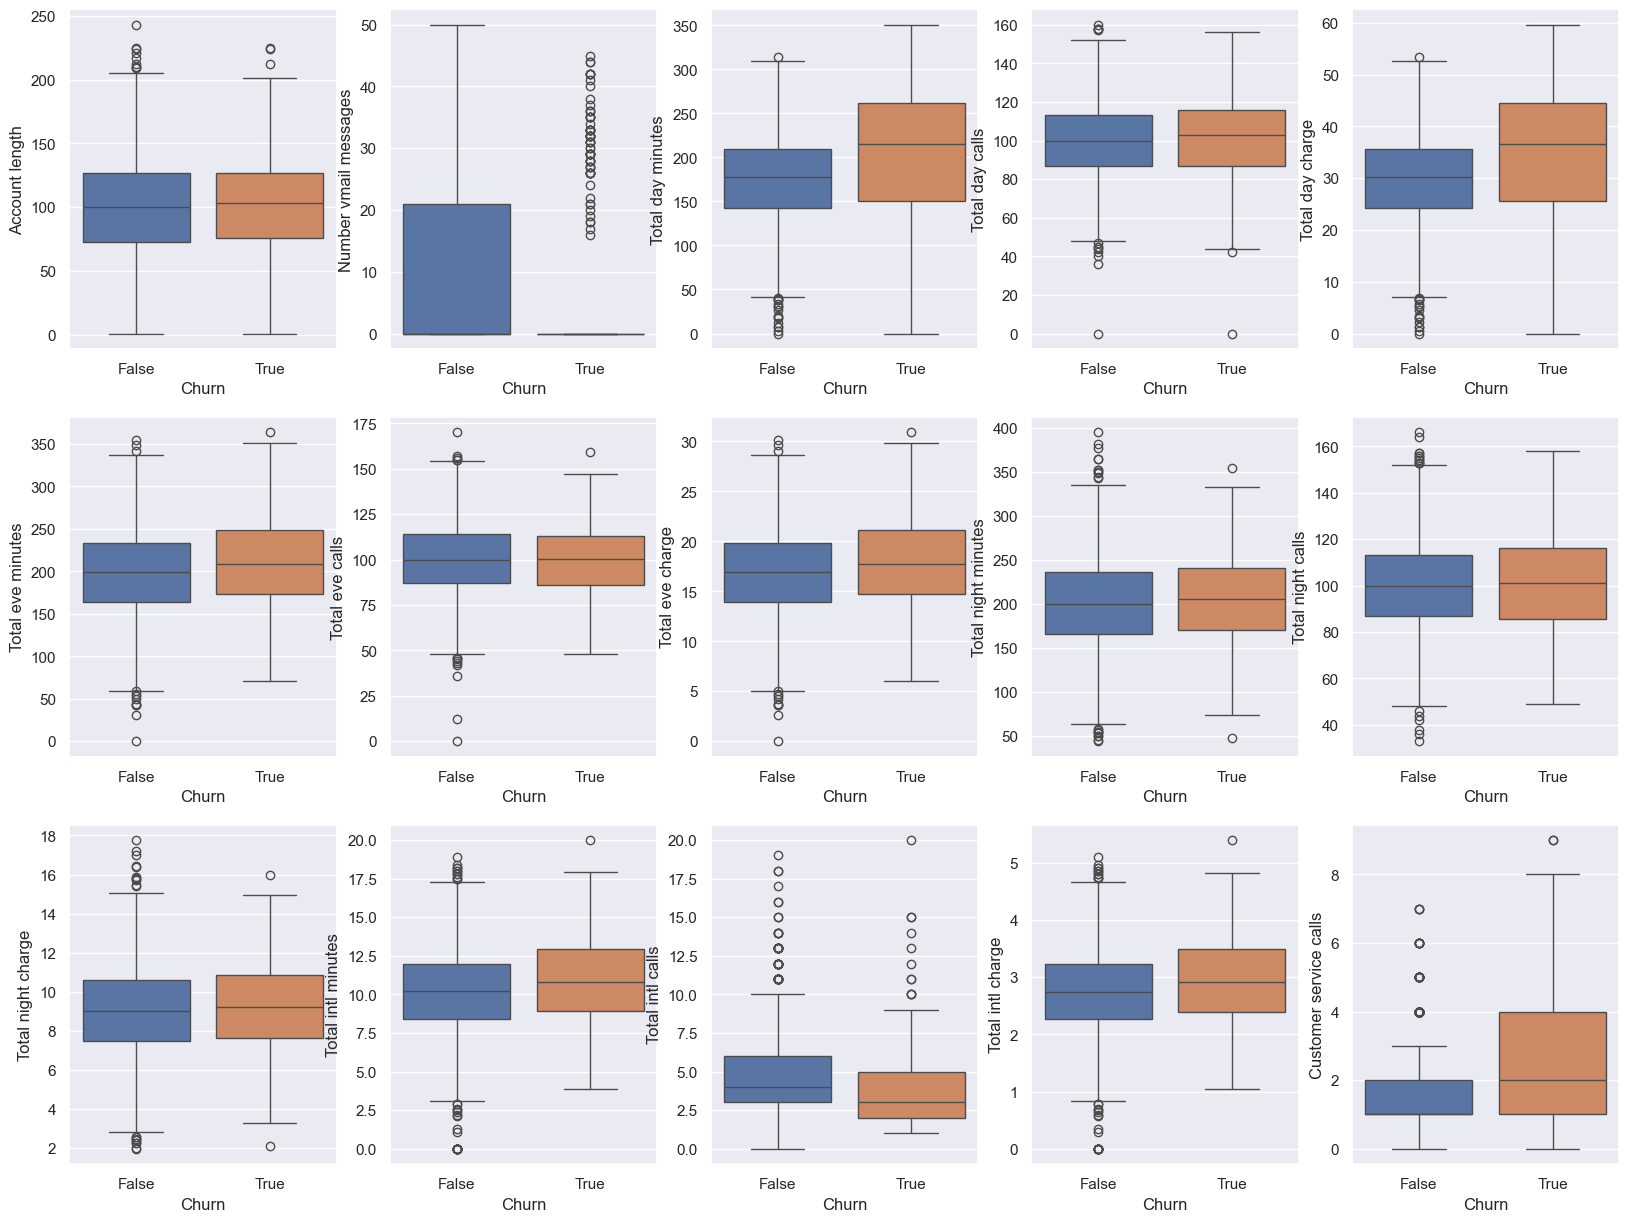

In [120]:
f, axes = plt.subplots(3,5, figsize=(20,15))
axes = axes.ravel()
count= 0
for var in churn_num_data:
    sb.boxplot(x=churndata['Churn'], y=churn_num_data[var], ax = axes[count], palette="deep")
    count +=1

<h5>
Important features: <br>
- Total day minutes <br>
- Total day charge <br>
- Total intl minutes <br>
- Total intl calls <br>
- Customer service calls <br>
<h5>


<h2> Correlation <h2>

<h5>
As churn is a bool type, just using pandas DataFrame .corr() method is not entirely correct
<br>
Instead, we find correlation between churn and variables via:<br>
1.Point Biserial Correlation<br>
2.Phi_K Correlation<br>
</h5>

In [64]:
churn_num_data = churndata.select_dtypes(exclude=[object])

In [65]:
churn_cat_data = churndata.select_dtypes(include=[object,bool])

In [66]:
print(churn_cat_data.dtypes)

State                 object
Area code             object
International plan    object
Voice mail plan       object
Churn                   bool
dtype: object


In [67]:
churn_num_data.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [68]:
churn_num_corr = churn_num_data.iloc[:,:16].corrwith(churn_num_data['Churn'].astype('float'),method=stats.pointbiserialr) 
#get correlation via PBS

In [69]:
print(churn_num_corr)

   Account length  Number vmail messages  Total day minutes  Total day calls  \
0        0.017728              -0.086474       1.956879e-01         0.018290   
1        0.360192               0.000008       2.023431e-24         0.345156   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0      1.956889e-01           0.072906        -0.001539          0.072893   
1      2.022321e-24           0.000165         0.936687          0.000165   

   Total night minutes  Total night calls  Total night charge  \
0             0.033639           0.012262            0.033635   
1             0.082462           0.526830            0.082496   

   Total intl minutes  Total intl calls  Total intl charge  \
0            0.086204         -0.069882           0.086216   
1            0.000008          0.000305           0.000008   

   Customer service calls  Churn  
0            2.025903e-01    1.0  
1            4.318653e-26    0.0  


<Axes: >

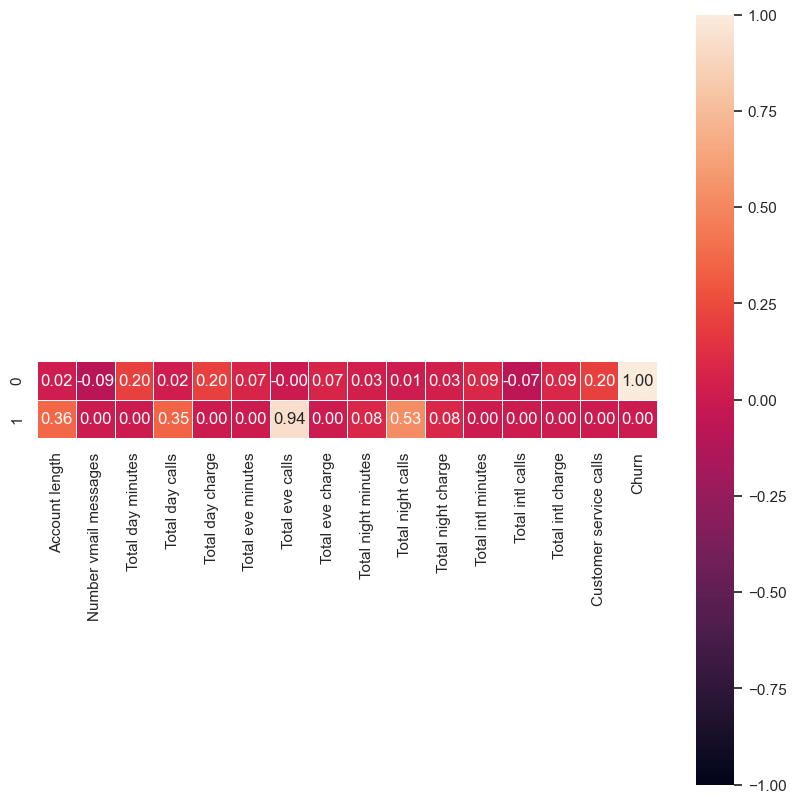

In [70]:
#heatmap representation of correlation of numerical vairable vs churn
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(churn_num_corr, vmin = -1, vmax = 1, annot = True, fmt= '0.2f', square = True, linewidths= 0.5, ax=ax)

In [71]:
#sort variables via correlation
churn_num_corr_T = churn_num_corr.transpose()
churn_num_corr_T.sort_values(by=1,ascending=False)

,0,1
Total eve calls,-0.001539,9.366866e-01
Total night calls,0.012262,5.268301e-01
Account length,0.017728,3.601916e-01
Total day calls,0.018290,3.451563e-01
Total night charge,0.033635,8.249586e-02
Total night minutes,0.033639,8.246221e-02
Total intl calls,-0.069882,3.050806e-04
Total eve charge,0.072893,1.652419e-04
Total eve minutes,0.072906,1.647968e-04
Total intl minutes,0.086204,8.303771e-06


### Highest correlation of numerical variables to churn:

1) Total eve calls : 0.9366866 
2) Total night calls : 0.5268301 
3) Account length : 0.3601916 

In [72]:
churn_cat_data_corr = churn_cat_data.phik_matrix() #get correlation via phik

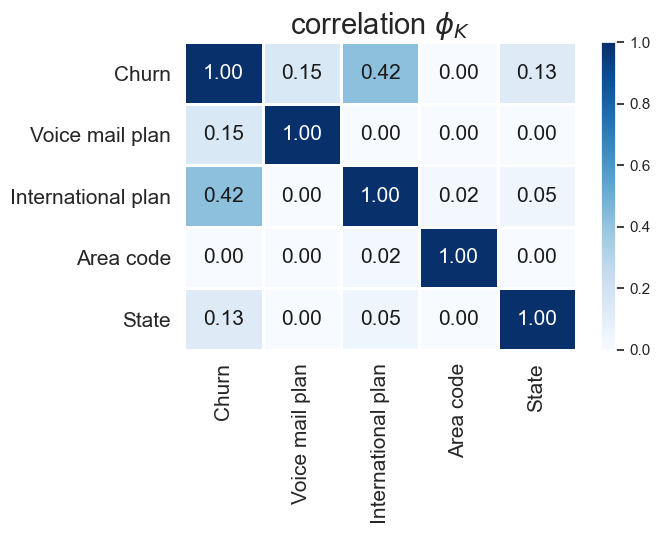

In [73]:
#visualization of correlation between categorical variables and churn
plot_correlation_matrix(churn_cat_data_corr.values, x_labels=churn_cat_data_corr.columns, y_labels=churn_cat_data_corr.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(7,5.5))
plt.tight_layout()

### Highest correlation of categorical variables to churn:

1) International plan : 0.42 
2) Voice mail plan : 0.15 
3) State : 0.13  


## Data Processing

In [74]:
#One hot encoding to convert categorical variables into numerical

churn_cat = churndata.select_dtypes(include=[object]).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(churndata[churn_cat])
encoded_cat_df = pd.DataFrame(encoded_data,columns = encoder.get_feature_names_out(churn_cat))
churn_OHE = churndata
churn_OHE = churn_OHE.drop(churn_cat,axis = 1)                  #removal of old categorical data from dataset
churn_OHE = pd.concat([churn_OHE, encoded_cat_df],axis = 1)     #appending new one hot encoded variables into dataseet
print(f"Encoded data : \n{churn_OHE}")

Encoded data : 
      Account length  Number vmail messages  Total day minutes  \
0                128                     25              265.1   
1                107                     26              161.6   
2                137                      0              243.4   
3                 84                      0              299.4   
4                 75                      0              166.7   
...              ...                    ...                ...   
2661              79                      0              134.7   
2662             192                     36              156.2   
2663              68                      0              231.1   
2664              28                      0              180.8   
2665              74                     25              234.4   

      Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0                 110             45.07              197.4               99   
1                 123            

## Splitting of data

In [75]:
#since our data is heavily skewed towards False(churn), we used SMOTE to balance our dataset

Predictors = churn_OHE.drop(['Churn'],axis = 1)
Response = churn_OHE['Churn']

Predictors_train , Predictors_test, Response_train, Response_test = train_test_split(Predictors, Response, test_size = 0.2, random_state= 10)
smt = SMOTE(random_state= 10)
Predictors_train , Response_train = smt.fit_resample(Predictors_train,Response_train)

  File "c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


# Models

### Logistic Regression Model

In [76]:
#setting up logistic Regression model
logreg = LogisticRegression(max_iter= 1000000)
logreg.fit(Predictors_train,Response_train)
Response_pred = logreg.predict(Predictors_test)

Text(0.5, 427.9555555555555, 'Predicted Churn')

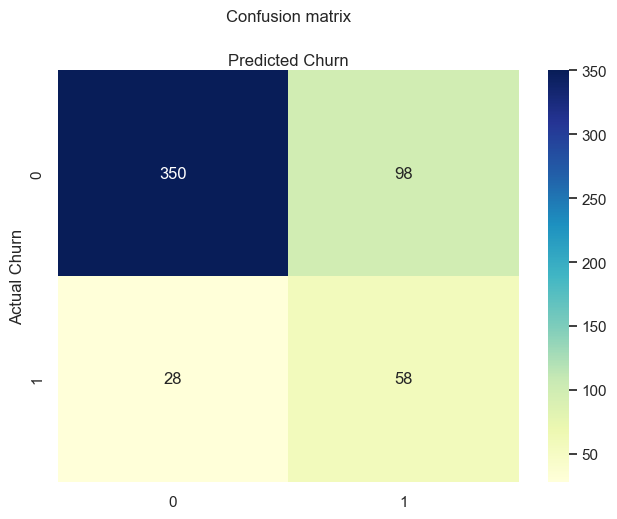

In [77]:
#creating visualization of predicted and actual results
cnf_matrix = confusion_matrix(Response_test, Response_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Churn')
plt.xlabel('Predicted Churn')

In [78]:
#results of logistic regression
print(classification_report(y_true=Response_test,y_pred=Response_pred))
accuracy = accuracy_score(Response_test,Response_pred)
roc = roc_auc_score(Response_test,Response_pred)
print("Accuracy : ", accuracy)  
print("ROC :", roc)

              precision    recall  f1-score   support

       False       0.93      0.78      0.85       448
        True       0.37      0.67      0.48        86

    accuracy                           0.76       534
   macro avg       0.65      0.73      0.66       534
weighted avg       0.84      0.76      0.79       534

Accuracy :  0.7640449438202247
ROC : 0.7278343023255813


## XG BOOST

In [79]:
#XGboost model
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, 
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0, 
                    max_depth = 7, min_child_weight=1, n_estimators=100, 
                    n_jobs=1, objective='binary:logistic', random_state=42, 
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, 
                    silent=True, subsample=1, enable_categorical=True)
xgb.fit(Predictors_train,Response_train)
Response_pred = xgb.predict(Predictors_test)

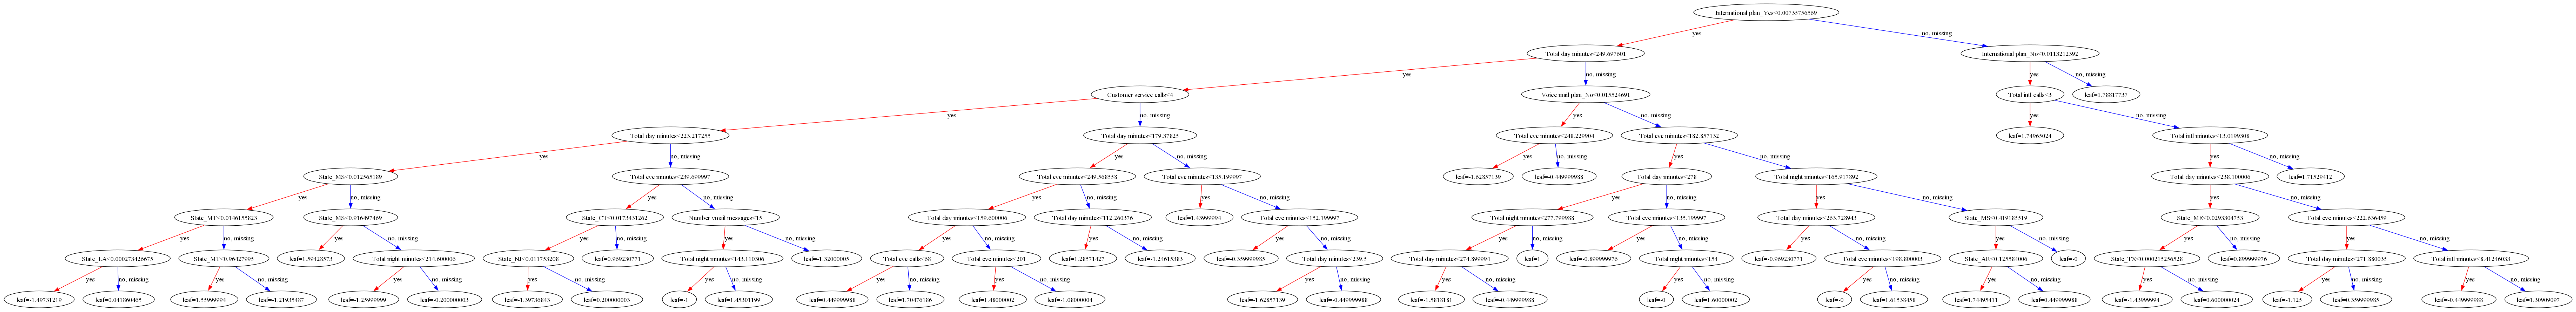

In [80]:
#xgboost tree visualization
xgbtree(xgb)
fig = plt.gcf()
fig.set_size_inches(150, 100)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

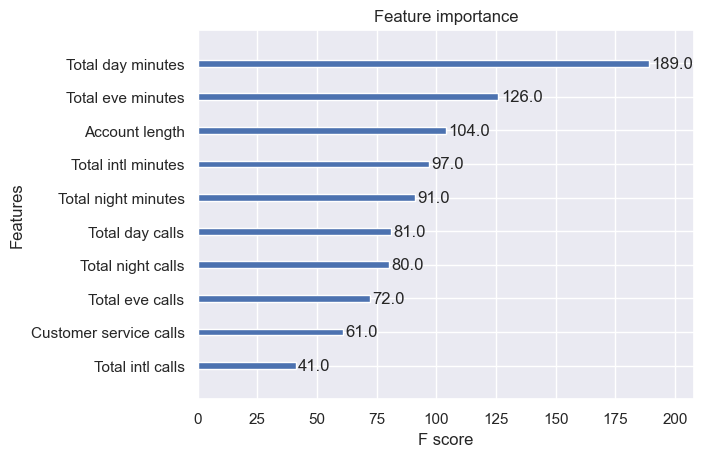

In [81]:
#tells us which variable is the most important in XGboost model
plot_importance(xgb.fit(Predictors_train, Response_train),max_num_features=10)

Text(0.5, 427.9555555555555, 'Predicted Churn')

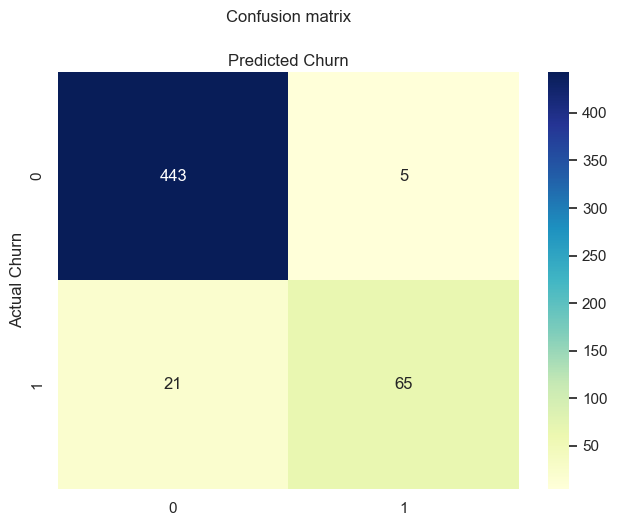

In [82]:
#creating visualization of predicted and actual results
cnf_matrix = confusion_matrix(Response_test, Response_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Churn')
plt.xlabel('Predicted Churn')

In [83]:
#XGboost results
print(classification_report(y_true=Response_test,y_pred=Response_pred))
accuracy = accuracy_score(Response_test,Response_pred)
roc = roc_auc_score(Response_test,Response_pred)
print("Accuracy : ", accuracy)
print("ROC :", roc)

              precision    recall  f1-score   support

       False       0.95      0.99      0.97       448
        True       0.93      0.76      0.83        86

    accuracy                           0.95       534
   macro avg       0.94      0.87      0.90       534
weighted avg       0.95      0.95      0.95       534

Accuracy :  0.951310861423221
ROC : 0.872326619601329


## Classification Tree Model

In [84]:
#Classification Tree
Ctree = DecisionTreeClassifier(random_state=0)
Ctree.fit(Predictors_train, Response_train)
Response_pred = Ctree.predict(Predictors_test)

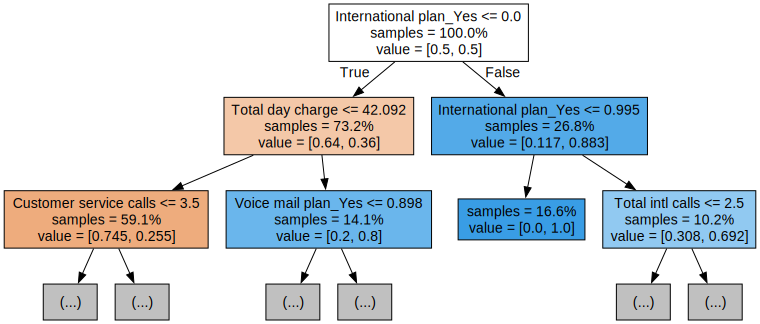

In [85]:
dot_data = export_graphviz(Ctree, 
                            feature_names = Predictors_train.columns,
                            filled = True,
                            max_depth = 2,
                            impurity = False,
                            proportion = True)
graph = graphviz.Source(dot_data)
display(graph)

Text(0.5, 427.9555555555555, 'Predicted Churn')

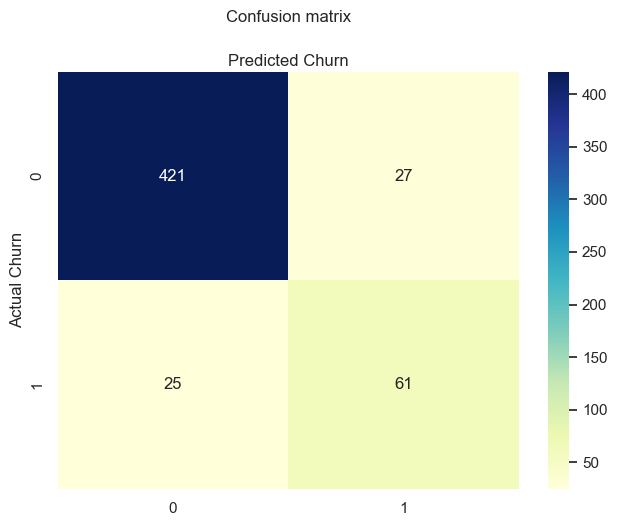

In [86]:
#creating visualization of predicted and actual results
cnf_matrix = confusion_matrix(Response_test, Response_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Churn')
plt.xlabel('Predicted Churn')

In [87]:
#Classification Tree results
print(classification_report(y_true=Response_test,y_pred=Response_pred))
accuracy = accuracy_score(Response_test,Response_pred)
roc = roc_auc_score(Response_test,Response_pred)
print("Accuracy : ", accuracy)
print("ROC :", roc)

              precision    recall  f1-score   support

       False       0.94      0.94      0.94       448
        True       0.69      0.71      0.70        86

    accuracy                           0.90       534
   macro avg       0.82      0.82      0.82       534
weighted avg       0.90      0.90      0.90       534

Accuracy :  0.9026217228464419
ROC : 0.8245172342192691


## Random Forest Model

In [88]:
#random Forest model
rf = RandomForestClassifier()
rf.fit(Predictors_train, Response_train)

RandomForestClassifier()

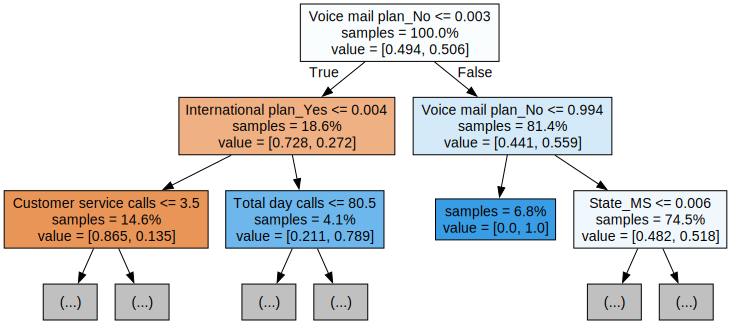

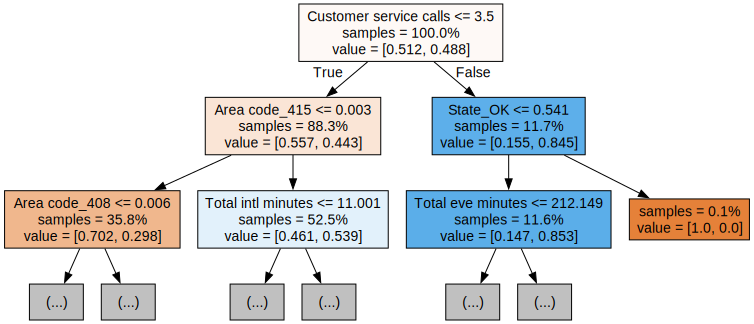

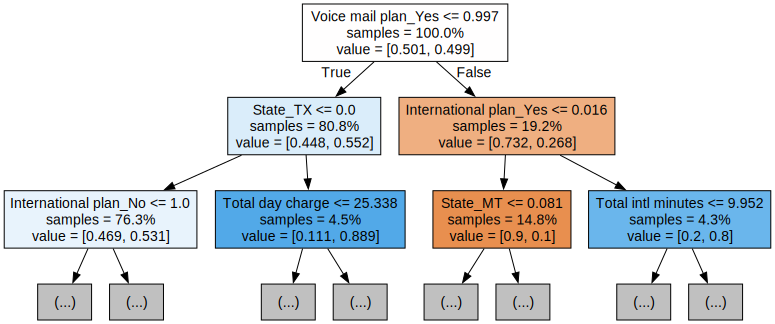

In [89]:
#sample of decision tress within random forest
for i in range(3):
    rftree = rf.estimators_[i]
    dot_data = export_graphviz(rftree, 
                               feature_names = Predictors_train.columns,
                               filled = True,
                               max_depth = 2,
                               impurity = False,
                               proportion = True)
    graph = graphviz.Source(dot_data)
    display(graph)

Text(0.5, 427.9555555555555, 'Predicted Churn')

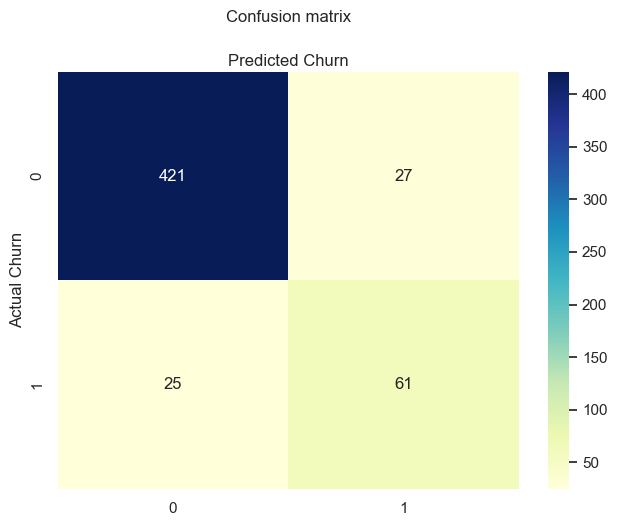

In [90]:
#creating visualization of predicted and actual results
cnf_matrix = confusion_matrix(Response_test, Response_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Churn')
plt.xlabel('Predicted Churn')

In [91]:
#Random Forest results
Response_predict = rf.predict(Predictors_test)
print(classification_report(y_true=Response_test,y_pred=Response_predict))
accuracy = accuracy_score(Response_test,Response_predict)
roc = roc_auc_score(Response_test,Response_predict)
print("Accuracy : ", accuracy)
print("ROC :", roc)

              precision    recall  f1-score   support

       False       0.92      0.97      0.95       448
        True       0.79      0.58      0.67        86

    accuracy                           0.91       534
   macro avg       0.86      0.78      0.81       534
weighted avg       0.90      0.91      0.90       534

Accuracy :  0.9082397003745318
ROC : 0.7761887458471761


## Random Forest with Hyper Parameters

In [92]:
#hyper parameters tuning
param_dist = {'n_estimators': randint(1,1000),
              'max_depth': randint(1,100)}

rand_search = RandomizedSearchCV(rf,param_distributions=param_dist,
                                 n_iter=30,cv=10, n_jobs=-1,
                                 scoring='accuracy')

rand_search.fit(Predictors_train,Response_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AEBA33DAC0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AEB505F620>},
                   scoring='accuracy')

In [93]:
#tuning results
best_rf = rand_search.best_estimator_
print("Best hyperparameters:", best_rf)
Response_predict = best_rf.predict(Predictors_test)

Best hyperparameters: RandomForestClassifier(max_depth=34, n_estimators=232)


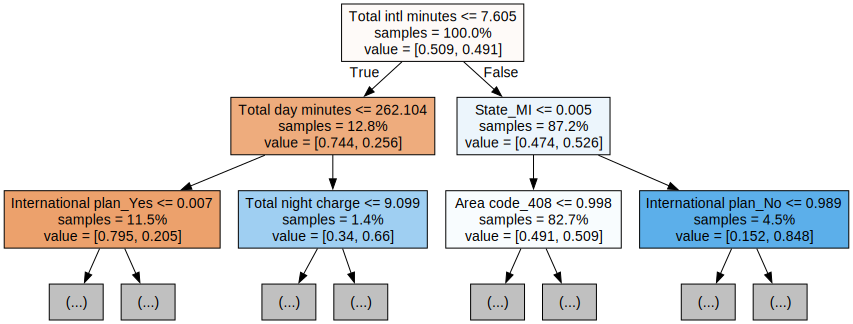

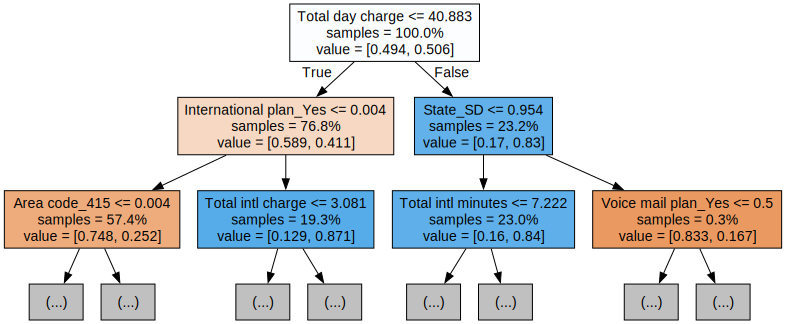

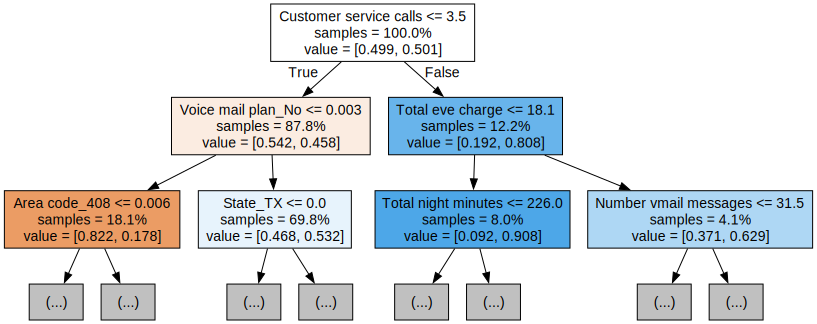

In [94]:
#sample of decision tress within random forest with hyper parameters
for i in range(3):
    rftree = best_rf.estimators_[i]
    dot_data = export_graphviz(rftree, 
                               feature_names = Predictors_train.columns,
                               filled = True,
                               max_depth = 2,
                               impurity = False,
                               proportion = True)
    graph = graphviz.Source(dot_data)
    display(graph)

Total day charge          0.098401
International plan_Yes    0.095768
International plan_No     0.094990
Total day minutes         0.090429
Customer service calls    0.061305
Area code_415             0.048692
Area code_510             0.037636
Area code_408             0.036562
Total eve minutes         0.032010
Total eve charge          0.031161
dtype: float64


<Axes: >

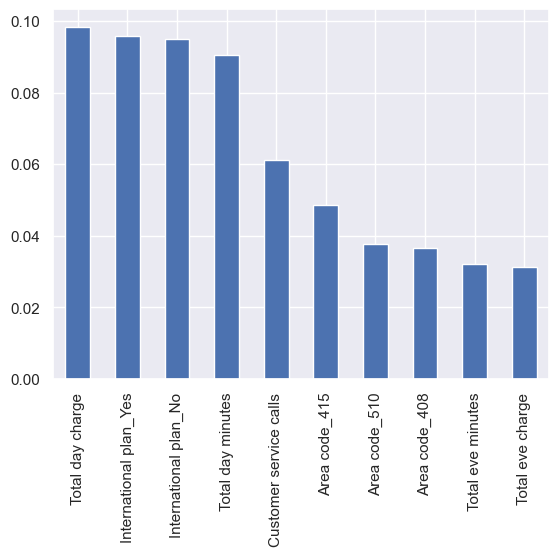

In [95]:
#importance of certain variables to predict churn
feature_importance = pd.Series(best_rf.feature_importances_,
                               index = Predictors_train.columns).sort_values(ascending=False)
feature_importance_trunc = feature_importance.iloc[0:10]
print(feature_importance_trunc)
feature_importance_trunc.plot.bar()

Text(0.5, 427.9555555555555, 'Predicted Churn')

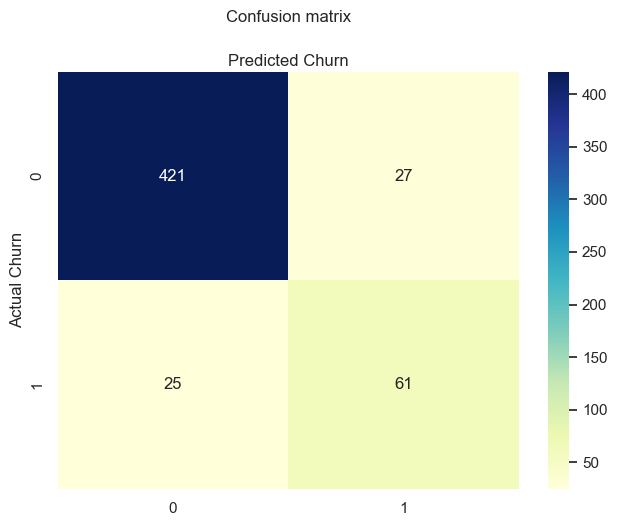

In [96]:
#creating visualization of predicted and actual results
cnf_matrix = confusion_matrix(Response_test, Response_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Churn')
plt.xlabel('Predicted Churn')

In [97]:
#results of Random Forest with Hyper parameters
print(classification_report(Response_test,Response_predict))
accuracy = accuracy_score(Response_test,Response_predict)
roc = roc_auc_score(Response_test,Response_predict)
print("Accuracy :", accuracy)
print("ROC :", roc)

              precision    recall  f1-score   support

       False       0.93      0.98      0.96       448
        True       0.86      0.63      0.72        86

    accuracy                           0.92       534
   macro avg       0.89      0.80      0.84       534
weighted avg       0.92      0.92      0.92       534

Accuracy : 0.9232209737827716
ROC : 0.8039088455149502


## Light Gradient Boosting Model

In [98]:
#LightGB model
lgbm = LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0,
                        learning_rate=0.1, max_depth=0, n_estimators=100,
                        num_leaves=50, objective='binary', silent=True)
lgbm.fit(Predictors_train,Response_train)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 1830, number of negative: 1830
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5491
[LightGBM] [Info] Number of data points in the train set: 3660, number of used features: 73
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(max_depth=0, num_leaves=50, objective='binary', silent=True)

<Axes: >

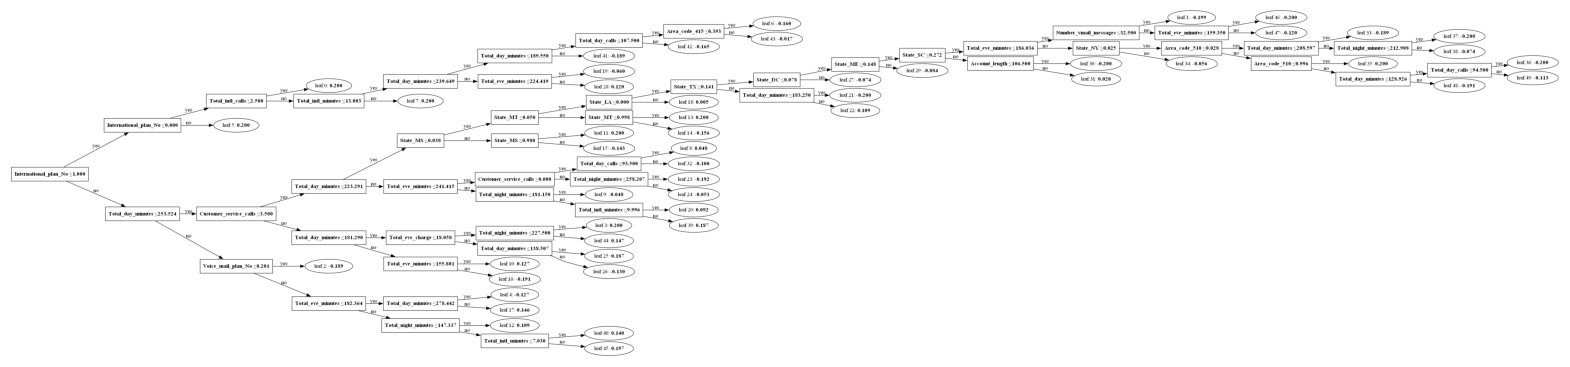

In [99]:
#Tree visualization of LGBM
lightgbm.plot_tree(lgbm, figsize=(20,20))

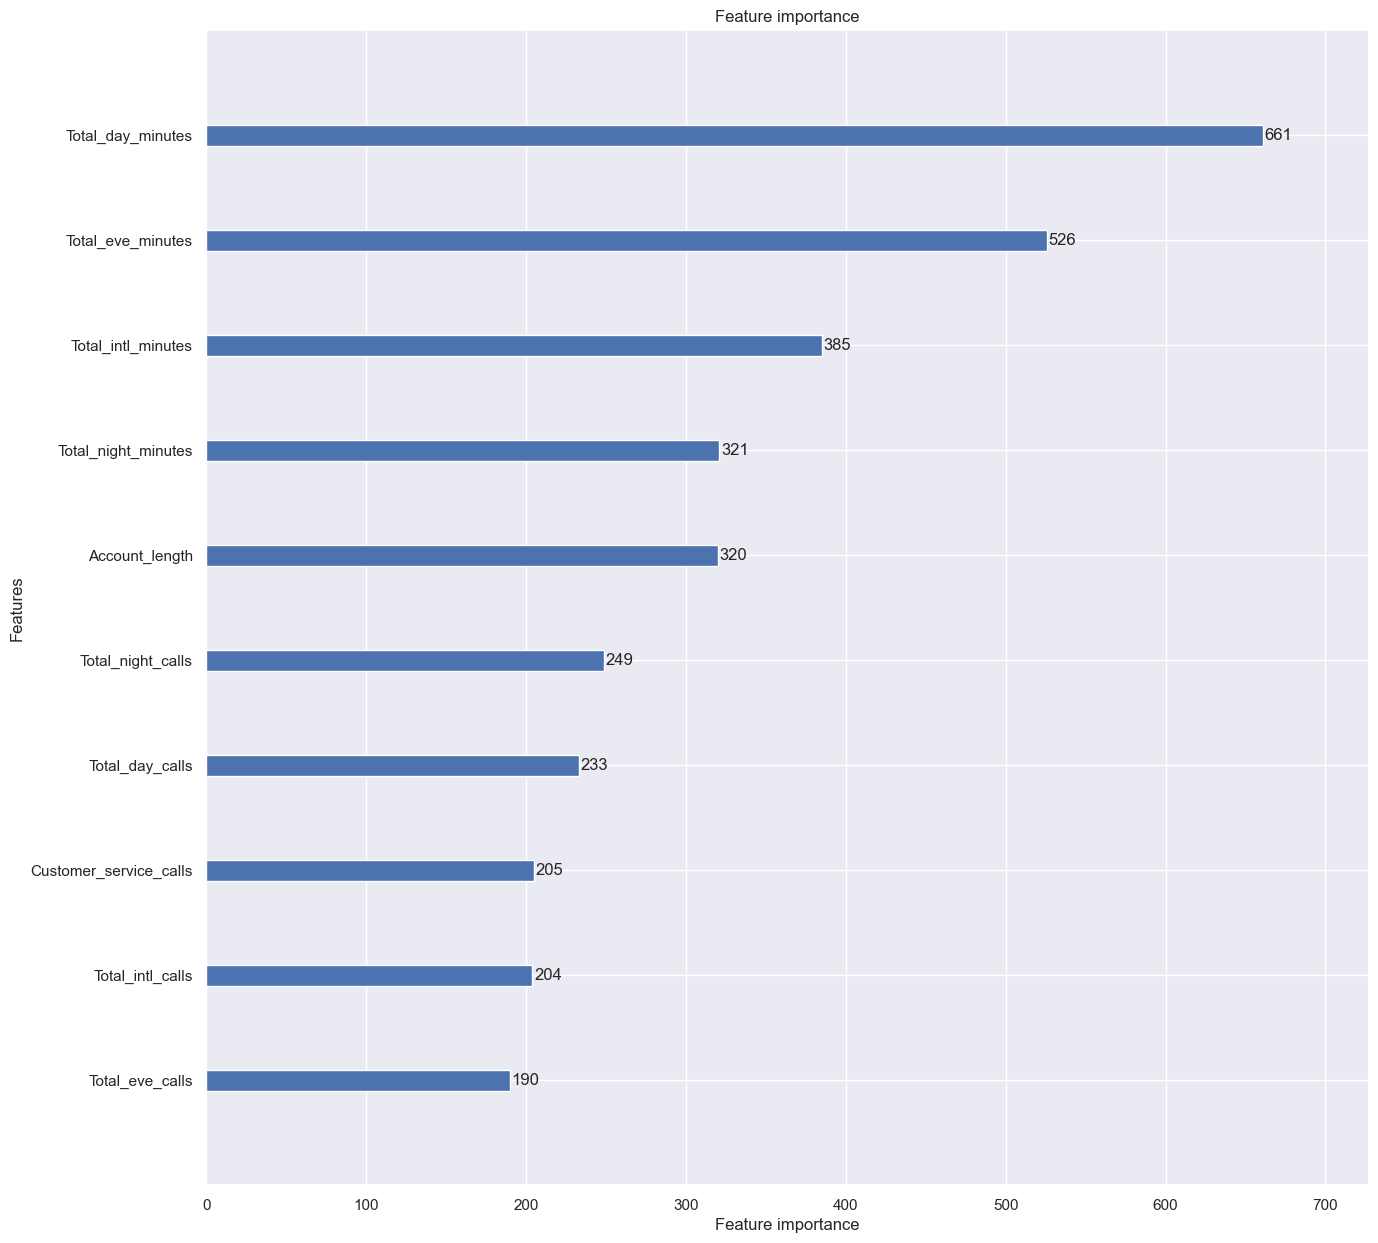

In [100]:
#importance of variables for LGBM
ax = lightgbm.plot_importance(lgbm, max_num_features=10, figsize=(15,15))
plt.show()

Text(0.5, 427.9555555555555, 'Predicted Churn')

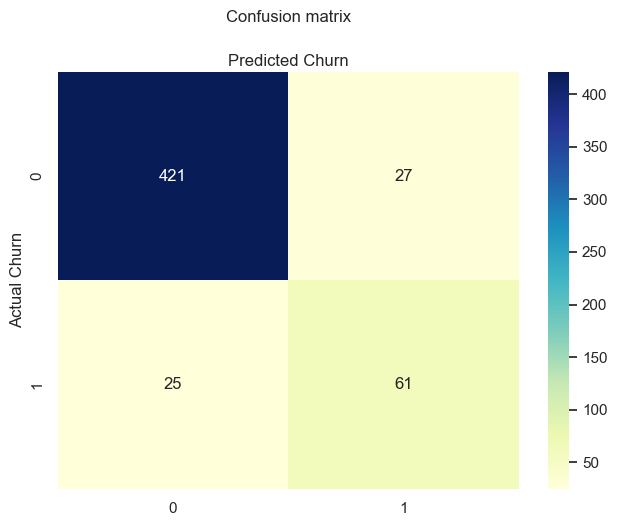

In [101]:
#creating visualization of predicted and actual results
cnf_matrix = confusion_matrix(Response_test, Response_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Churn')
plt.xlabel('Predicted Churn')

In [102]:
#Results of LightGBM
Response_predict = lgbm.predict(Predictors_test)
print(classification_report(Response_test,Response_predict))
accuracy = accuracy_score(Response_test,Response_predict)
roc = roc_auc_score(Response_test,Response_predict)
print("Accuracy :", accuracy)
print("ROC :", roc)

[LightGBM] [Warning] Unknown parameter: silent
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       448
        True       0.91      0.72      0.81        86

    accuracy                           0.94       534
   macro avg       0.93      0.85      0.89       534
weighted avg       0.94      0.94      0.94       534

Accuracy : 0.9438202247191011
ROC : 0.8537686877076412


# Cross Checking and Validation of Model

In [103]:
#Checking model accuracy against new set of test data
#To determine overfitting / underfitting
churn_test_data = pd.read_csv('churn_test.csv')

In [104]:
#One hot encoding the test data
churn_test_cat = churn_test_data.select_dtypes(include=[object]).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
encoded_test_data = encoder.fit_transform(churn_test_data[churn_test_cat])
encoded_test_cat_df = pd.DataFrame(encoded_test_data,columns = encoder.get_feature_names_out(churn_test_cat))
churn_test_OHE = churn_test_data
churn_test_OHE = churn_test_OHE.drop(churn_test_cat,axis = 1)
churn_test_OHE = pd.concat([churn_test_OHE, encoded_test_cat_df],axis = 1)
print(f"Encoded data : \n{churn_test_OHE}")

Encoded data : 
     Account length  Area code  Number vmail messages  Total day minutes  \
0               117        408                      0              184.5   
1                65        415                      0              129.1   
2               161        415                      0              332.9   
3               111        415                      0              110.4   
4                49        510                      0              119.3   
..              ...        ...                    ...                ...   
662             114        415                     26              137.1   
663             106        408                     29               83.6   
664              60        415                      0              193.9   
665             159        415                      0              169.8   
666             184        510                      0              213.8   

     Total day calls  Total day charge  Total eve minutes  Total eve ca

In [105]:
#splitting churn and other variables
Response = churn_OHE['Churn']
Predictors = churn_OHE.drop(['Churn'],axis = 1)

              precision    recall  f1-score   support

       False       0.95      0.79      0.86      2278
        True       0.38      0.73      0.50       388

    accuracy                           0.78      2666
   macro avg       0.66      0.76      0.68      2666
weighted avg       0.86      0.78      0.81      2666

Accuracy :  0.7843210802700675
ROC : 0.7636683924223636


<Axes: >

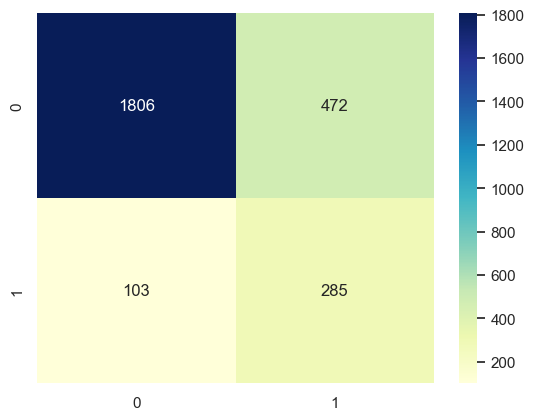

In [106]:
#Validating Logistic Regression Model

LR_Response_predict = logreg.predict(Predictors)
print(classification_report(y_true=Response,y_pred=LR_Response_predict))
accuracy = accuracy_score(Response,LR_Response_predict)
roc = roc_auc_score(Response,LR_Response_predict)
print("Accuracy : ", accuracy)
print("ROC :", roc)
cm = confusion_matrix(Response,LR_Response_predict)
sb.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      2278
        True       0.99      0.95      0.97       388

    accuracy                           0.99      2666
   macro avg       0.99      0.97      0.98      2666
weighted avg       0.99      0.99      0.99      2666



Accuracy :  0.9902475618904726
ROC : 0.971840690422961


<Axes: >

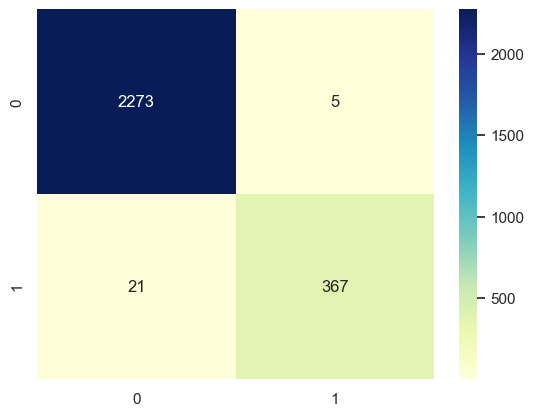

In [107]:
#Validating XGboost Model
XG_Response_predict = xgb.predict(Predictors)
print(classification_report(y_true=Response,y_pred=XG_Response_predict))
accuracy = accuracy_score(Response,XG_Response_predict)
roc = roc_auc_score(Response,XG_Response_predict)
print("Accuracy : ", accuracy)
print("ROC :", roc)
cm = confusion_matrix(Response,XG_Response_predict)
sb.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      2278
        True       0.93      0.94      0.93       388

    accuracy                           0.98      2666
   macro avg       0.96      0.96      0.96      2666
weighted avg       0.98      0.98      0.98      2666

Accuracy :  0.9804951237809453
ROC : 0.9618572540571853


<Axes: >

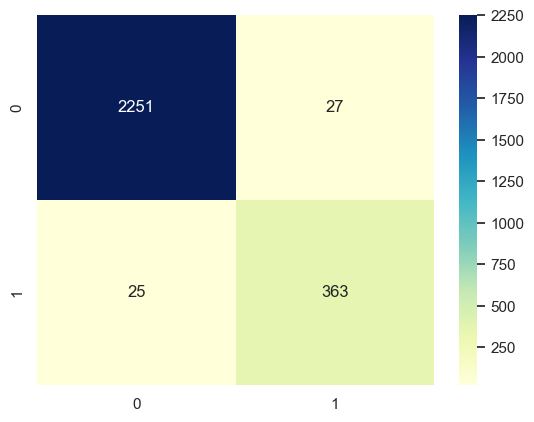

In [108]:
#Validating Classification Tree Model
CT_Response_predict = Ctree.predict(Predictors)
print(classification_report(y_true=Response,y_pred=CT_Response_predict))
accuracy = accuracy_score(Response,CT_Response_predict)
roc = roc_auc_score(Response,CT_Response_predict)
print("Accuracy : ", accuracy)
print("ROC :", roc)
cm = confusion_matrix(Response,CT_Response_predict)
sb.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

              precision    recall  f1-score   support

       False       0.98      0.99      0.99      2278
        True       0.96      0.91      0.93       388

    accuracy                           0.98      2666
   macro avg       0.97      0.95      0.96      2666
weighted avg       0.98      0.98      0.98      2666

Accuracy :  0.9816204051012754
ROC : 0.950754867264647


<Axes: >

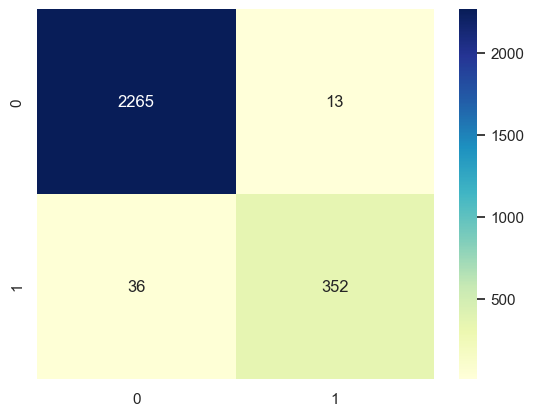

In [109]:
#Validating Random Forest Model
RF_Response_predict = rf.predict(Predictors)
print(classification_report(y_true=Response,y_pred=RF_Response_predict))
accuracy = accuracy_score(Response,RF_Response_predict)
roc = roc_auc_score(Response,RF_Response_predict)
print("Accuracy : ", accuracy)
print("ROC :", roc)
cm = confusion_matrix(Response,RF_Response_predict)
sb.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      2278
        True       0.98      0.92      0.95       388

    accuracy                           0.98      2666
   macro avg       0.98      0.96      0.97      2666
weighted avg       0.98      0.98      0.98      2666

Accuracy :  0.9846211552888222
ROC : 0.9567874695654535


<Axes: >

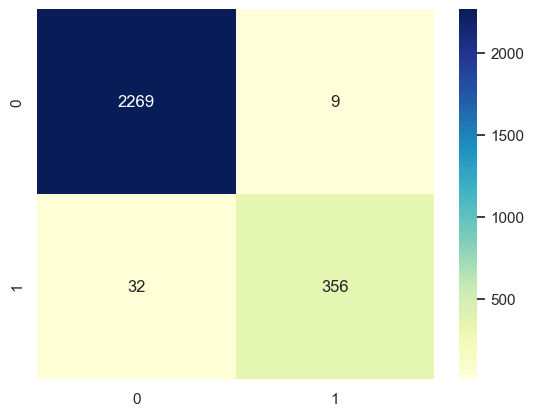

In [110]:
#Validating Random Forest with Hyperparameter Model
RFH_Response_predict = best_rf.predict(Predictors)
print(classification_report(y_true=Response,y_pred=RFH_Response_predict))
accuracy = accuracy_score(Response,RFH_Response_predict)
roc = roc_auc_score(Response,RFH_Response_predict)
print("Accuracy : ", accuracy)
print("ROC :", roc)
cm = confusion_matrix(Response,RFH_Response_predict)
sb.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

[LightGBM] [Warning] Unknown parameter: silent
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      2278
        True       0.98      0.94      0.96       388

    accuracy                           0.99      2666
   macro avg       0.99      0.97      0.98      2666
weighted avg       0.99      0.99      0.99      2666

Accuracy :  0.9887471867966992
ROC : 0.9677552202601305


<Axes: >

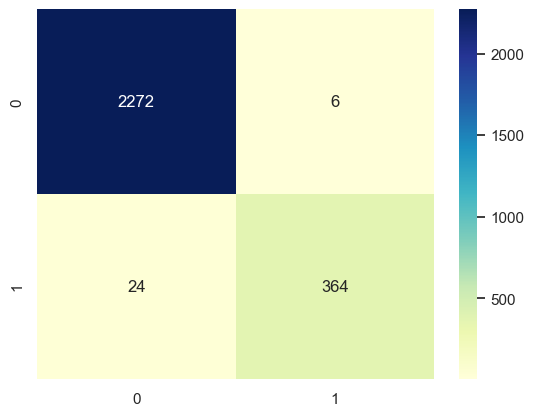

In [111]:
#Validating Light Gradient Boosting Model
lgbm_Response_predict = lgbm.predict(Predictors)
print(classification_report(y_true=Response,y_pred=lgbm_Response_predict))
accuracy = accuracy_score(Response,lgbm_Response_predict)
roc = roc_auc_score(Response,lgbm_Response_predict)
print("Accuracy : ", accuracy)
print("ROC :", roc)
cm = confusion_matrix(Response,lgbm_Response_predict)
sb.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

<h4> 
Model Ranking:
Assessed via Accuracy and ROC

1) XGBOOST                                  (Acc:0.990 / ROC: 0.972)
2) Light GBM                                (Acc:0.989 / ROC: 0.968)
3) Random Forest with Hyper Parameter       (Acc:0.986 / ROC: 0.959)
4) Random Forest                            (Acc:0.983 / ROC: 0.953)
5) Classification Tree                      (Acc:0.980 / ROC: 0.962)
6) Logistic Regression                      (Acc:0.784 / ROC: 0.764)

</h4>